In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# importind training data
df_input = pd.read_csv('Input.csv', sep = ';')
df_input = df_input.replace(-999.0000, np.NaN)
df_input.dropna()
df_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 16 columns):
Well           2460 non-null object
Depth          2460 non-null float64
GR             2460 non-null float64
NPHI           2460 non-null float64
RHOB           2460 non-null float64
PEF            2460 non-null float64
DT             2460 non-null float64
RD_LOG         2460 non-null float64
VSH            2460 non-null float64
SW             2460 non-null float64
KLOGH          2460 non-null float64
PHIF           2460 non-null float64
PHID           2460 non-null float64
N-D            2460 non-null float64
Id_discreto    2460 non-null int64
Lithofacies    2460 non-null object
dtypes: float64(13), int64(1), object(2)
memory usage: 307.6+ KB


F.TBar     692
F.TFlat      8
F.TCh      747
F.MBar     595
F.US        70
F.LS       259
F.Off       34
F.Marsh     55
Name: Id_discreto, dtype: int64

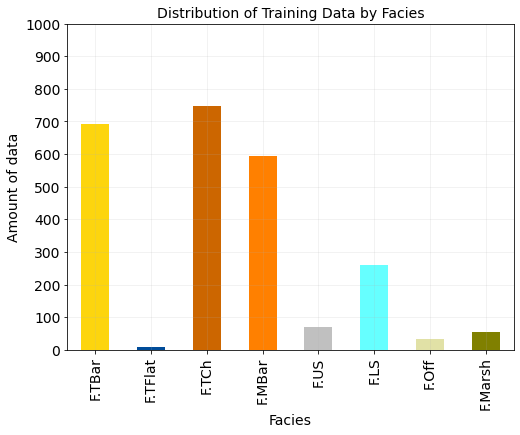

In [3]:
facies_colors = ['#FDD50E', '#004C99', '#CC6600', '#FF8000', '#C0C0C0', '#66FFFF', '#E1E1A6', '#808000']
facies_labels = ['F.TBar', 'F.TFlat', 'F.TCh', 'F.MBar', 'F.US', 'F.LS', 'F.Off','F.Marsh']
facies_counts = df_input['Id_discreto'].value_counts().sort_index()
facies_counts.index = facies_labels

fig, ax = plt.subplots(figsize = (8,6))
ax = facies_counts.plot(kind = 'bar', color = facies_colors, fontsize = 14)

ticks = np.arange(0, 1001, 100)
ax.set_yticks(ticks)
ax.grid(which = 'major', alpha = 0.2)
plt.xlabel("Facies",  fontsize=14)
plt.ylabel("Amount of data",  fontsize=14)
plt.title('Distribution of Training Data by Facies', fontsize=14)
facies_counts

In [ ]:
#fig.savefig('figure_1.jpg', dpi=600)

### Depositional facies (transitional zone) & discrete value
* **Tidal Bar:**        1
* **Tidal Flat muddy:** 2
* **Tidal Channel:**    3
* **Mouthbar:**         4
* **Upper Shoreface:**  5
* **Lower Shoreface:**  6
* **Offshore:**         7
* **Marsh:**            8

## 2D Plots

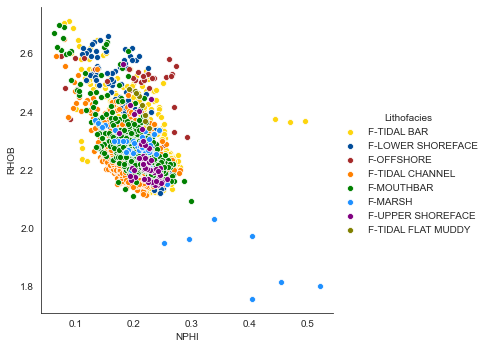

In [8]:
#Plots
color = ['#FDD50E', '#004C99', 'brown', '#FF8000', 'g', 'dodgerblue', 'purple', '#808000']
sb.set_style("white")
plot1 = sb.pairplot(df_input,
                    x_vars = ["NPHI"],
                    y_vars = ["RHOB"],
                    height = 5,
                    hue = "Lithofacies",
                   palette = color)

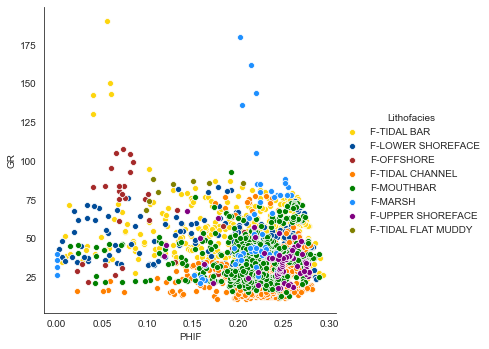

In [9]:
sb.set_style("white")
plot2 = sb.pairplot(df_input,
                    x_vars = ["PHIF"],
                    y_vars = ["GR"],
                    height = 5,
                    hue = "Lithofacies",
                   palette = color)

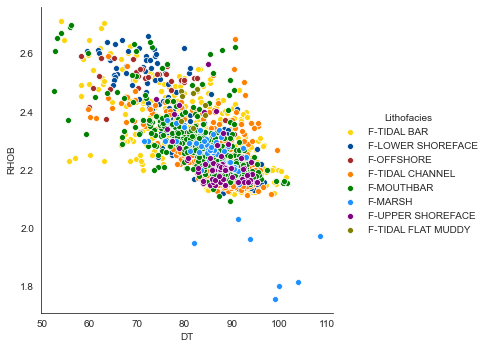

In [10]:
sb.set_style("white")
plot3 = sb.pairplot(df_input,
                    x_vars = ["DT"],
                    y_vars = ["RHOB"],
                    height = 5,
                    hue = "Lithofacies",
                   palette = color)

## 3D Plots

Text(0.5, 0.92, '3D scatter plot')

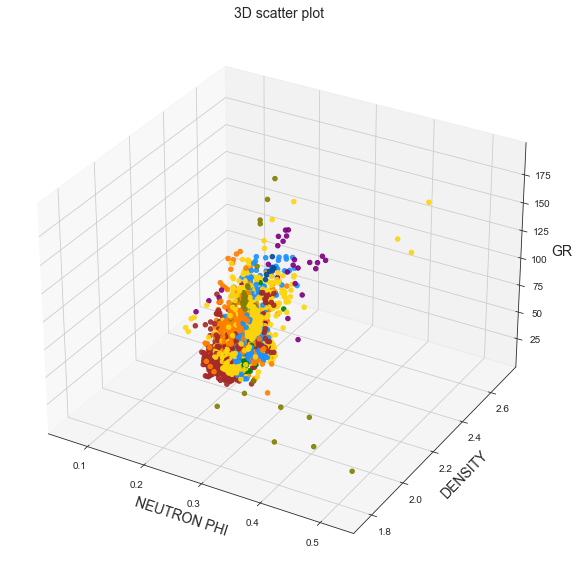

In [11]:
colors_2 = {1:'#FDD50E', 2:'#004C99', 3:'brown', 4:'#FF8000', 5:'g', 6:'dodgerblue', 7:'purple', 8:'#808000'}
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_input.NPHI, df_input.RHOB, df_input.GR, \
           c= df_input['Id_discreto'].apply(lambda x: colors_2[x]), alpha =0.9)

ax.set_xlabel('NEUTRON PHI', fontsize = 14)
ax.set_ylabel('DENSITY',  fontsize = 14)
ax.set_zlabel('GR',  fontsize = 14)


plt.title('3D scatter plot',  fontsize = 14)

## Feature importance

In [12]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier

In [13]:
# Selecting variables
array = df_input.values
features = array[:, [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]].astype('int')
target = array[:, -2].astype('int')

Feature rankin:
1. feature 0 (0.344778)
2. feature 8 (0.291178)
3. feature 4 (0.199607)
4. feature 5 (0.095973)
5. feature 3 (0.057641)
6. feature 7 (0.007705)
7. feature 2 (0.003117)
8. feature 11 (0.000000)
9. feature 10 (0.000000)
10. feature 9 (0.000000)
11. feature 6 (0.000000)
12. feature 1 (0.000000)


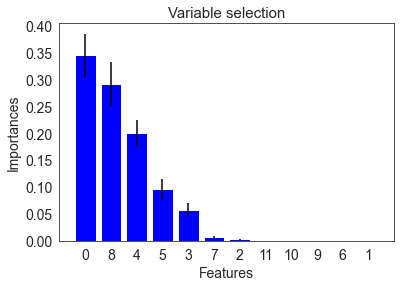

In [14]:
# Build a forest and compute the impurity-based feature importances
forest = ExtraTreesClassifier(n_estimators = 250, random_state = 0)
forest.fit(features, target)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis = 0)
indices = np.argsort(importances)[::-1]

print("Feature rankin:")

for f in range (features.shape[1]):
    print("%d. feature %d (%f)" % (f+1, indices[f], importances[indices[f]]))
plt.figure()
plt.title("Variable selection", fontsize = 15)
plt.bar(range(features.shape[1]), importances[indices], color = "blue", yerr = std[indices], align = "center")
plt.xticks(range(features.shape[1]), indices, fontsize =14)
plt.yticks(fontsize = 14)
plt.xlim([-1, features.shape[1]])
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importances', fontsize = 14)
#plt.savefig('Feature_importance_RFE.png',dpi=600)
plt.show()

* **Gamma-Ray** = 0
* **NPHI**     = 1
* **RHOB**     = 2
* **PEF**      = 3
* **DT**       = 4
* **RD_LOG**   = 5
* **VSH**      = 6
* **SW**       = 7
* **KLOG**     = 8
* **PHIF**     = 9
* **PHID**     = 10
* **N-D**      = 11